<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [74]:
# Читаем только первую строку файла
with open('dst-3.0_16_1_hh_database.csv', 'r', encoding='utf-8') as file:
    first_line = file.readline()

print("Первая строка файла:")
print(repr(first_line))  # repr покажет спецсимволы
print("\nДлина строки:", len(first_line))
print("Содержание:")
print(first_line)


# Читаем файл с правильным разделителем
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# Получаем размерность таблицы
dimension = df.shape
print(f"Размерность таблицы: {dimension}")

# Дополнительная информация о таблице
print(f"Число строк: {dimension[0]}")
print(f"Число столбцов: {dimension[1]}")

Первая строка файла:
'Пол, возраст;ЗП;Ищет работу на должность:;Город, переезд, командировки;Занятость;График;Опыт работы;Последнее/нынешнее место работы;Последняя/нынешняя должность;Образование и ВУЗ;Обновление резюме;Авто\n'

Длина строки: 202
Содержание:
Пол, возраст;ЗП;Ищет работу на должность:;Город, переезд, командировки;Занятость;График;Опыт работы;Последнее/нынешнее место работы;Последняя/нынешняя должность;Образование и ВУЗ;Обновление резюме;Авто

Размерность таблицы: (44744, 12)
Число строк: 44744
Число столбцов: 12


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [75]:
# Выводим информацию о таблице
print("Размерность таблицы:", df.shape)
print("\n" + "="*50)
print("ПЕРВЫЕ 3 СТРОКИ ТАБЛИЦЫ:")
print("="*50)
print(df.head(3))

print("\n" + "="*50)
print("ПОСЛЕДНИЕ 3 СТРОКИ ТАБЛИЦЫ:")
print("="*50)
print(df.tail(3))


Размерность таблицы: (44744, 12)

ПЕРВЫЕ 3 СТРОКИ ТАБЛИЦЫ:
                                   Пол, возраст          ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982  20000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   
2                  Оператор   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [76]:
# Выводим основную информацию о таблице
print("ОСНОВНАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:")
print("=" * 50)
print(f"Размерность таблицы: {df.shape}")
print(f"Общее количество элементов: {df.size}")

print("\n" + "=" * 50)
print("ИНФОРМАЦИЯ О НЕПУСТЫХ ЗНАЧЕНИЯХ И ТИПАХ ДАННЫХ:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("ПОДРОБНАЯ ИНФОРМАЦИЯ ПО КАЖДОМУ СТОЛБЦУ:")
print("=" * 50)
print("Количество непустых значений по столбцам:")
print(df.count())

print("\nТипы данных по столбцам:")
print(df.dtypes)

print("\n" + "=" * 50)
print("ПРОВЕРКА ТИПОВ ДАННЫХ:")
print("=" * 50)
# Проверим, все ли столбцы имеют одинаковый тип данных
unique_dtypes = df.dtypes.unique()
print(f"Уникальные типы данных в таблице: {unique_dtypes}")
print(f"Количество уникальных типов: {len(unique_dtypes)}")

if len(unique_dtypes) == 1:
    print(f"Все столбцы имеют тип: {unique_dtypes[0]}")
else:
    print("Столбцы имеют разные типы данных:")
    for dtype in unique_dtypes:
        columns_with_dtype = df.dtypes[df.dtypes == dtype].index.tolist()
        print(f"- {dtype}: {columns_with_dtype}")

ОСНОВНАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:
Размерность таблицы: (44744, 12)
Общее количество элементов: 536928

ИНФОРМАЦИЯ О НЕПУСТЫХ ЗНАЧЕНИЯХ И ТИПАХ ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновл

4. Обратите внимание на информацию о числе непустых значений.

In [77]:
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
print("=" * 50)

# Общая информация о пропусках
print(f"Общее количество пропусков в таблице: {df.isnull().sum().sum()}")
print(f"Доля пропусков в таблице: {df.isnull().sum().sum() / df.size:.2%}")

print("\n" + "=" * 50)
print("ПРОПУСКИ ПО СТОЛБЦАМ:")
print("=" * 50)

# Детальная информация по каждому столбцу
missing_info = pd.DataFrame({
    'Столбец': df.columns,
    'Тип_данных': df.dtypes,
    'Всего_значений': df.shape[0],
    'Непустых_значений': df.count(),
    'Пропусков': df.isnull().sum(),
    'Доля_пропусков': (df.isnull().sum() / df.shape[0]).round(4)
})

print(missing_info)

print("\n" + "=" * 50)
print("СТОЛБЦЫ С ПРОПУСКАМИ:")
print("=" * 50)

# Выводим только столбцы с пропусками
columns_with_missing = missing_info[missing_info['Пропусков'] > 0]
if len(columns_with_missing) > 0:
    print(columns_with_missing[['Столбец', 'Пропусков', 'Доля_пропусков']])
else:
    print("Пропусков не обнаружено")

print("\n" + "=" * 50)
print("ПРОВЕРКА ПУСТЫХ СТРОК И ДРУГИХ ВИДОВ ПРОПУСКОВ:")
print("=" * 50)

# Проверяем различные виды "пустых" значений
for column in df.columns:
    empty_strings = (df[column] == '').sum()
    if empty_strings > 0:
        print(f"Столбец '{column}': {empty_strings} пустых строк")
    
    # Проверяем пробелы
    if df[column].dtype == 'object':
        whitespace_only = df[column].str.strip().eq('').sum()
        if whitespace_only > 0:
            print(f"Столбец '{column}': {whitespace_only} значений, содержащих только пробелы")

АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
Общее количество пропусков в таблице: 171
Доля пропусков в таблице: 0.03%

ПРОПУСКИ ПО СТОЛБЦАМ:
                                                         Столбец Тип_данных  \
Пол, возраст                                        Пол, возраст     object   
ЗП                                                            ЗП     object   
Ищет работу на должность:              Ищет работу на должность:     object   
Город, переезд, командировки        Город, переезд, командировки     object   
Занятость                                              Занятость     object   
График                                                    График     object   
Опыт работы                                          Опыт работы     object   
Последнее/нынешнее место работы  Последнее/нынешнее место работы     object   
Последняя/нынешняя должность        Последняя/нынешняя должность     object   
Образование и ВУЗ                              Образование и ВУЗ     object   
Обнов

5. Выведите основную статистическую информацию о столбцах.


In [78]:
print("ОСНОВНАЯ СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:")
print("=" * 60)

# Общая статистика для числовых столбцов
print("\nСТАТИСТИКА ДЛЯ ЧИСЛОВЫХ СТОЛБЦОВ:")
print(df.describe())

print("\n" + "=" * 60)
print("АНАЛИЗ СТОЛБЦА 'Опыт работы':")
print("=" * 60)

# Анализ столбца "Опыт работы"
experience_column = 'Опыт работы'
if experience_column in df.columns:
    unique_experience = df[experience_column].nunique()
    print(f"Количество уникальных значений в столбце 'Опыт работы': {unique_experience}")
    #print(f"\nВсе уникальные значения в столбце 'Опыт работы':")
    #print(df[experience_column].unique())
    #print(f"\nЧастота встречаемости каждого значения:")
    #print(df[experience_column].value_counts().head(10))
else:
    print("Столбец 'Опыт работы' не найден в таблице")
    print("Доступные столбцы:", df.columns.tolist())

print("\n" + "=" * 60)
print("АНАЛИЗ СТОЛБЦА 'Ищет работу на должность:':")
print("=" * 60)

# Анализ столбца с искомыми должностями
job_position_column = 'Ищет работу на должность:'
if job_position_column in df.columns:
    unique_positions = df[job_position_column].nunique()
    print(f"Количество уникальных должностей: {unique_positions}")
    print(f"\nСамые распространенные искомые должности:")
    top_positions = df[job_position_column].value_counts().head(10)
    print(top_positions)
    
    # Находим самую распространенную должность
    most_common_position = df[job_position_column].value_counts().index[0]
    most_common_count = df[job_position_column].value_counts().iloc[0]
    print(f"\nСамая распространенная должность: '{most_common_position}'")
    print(f"Количество соискателей: {most_common_count}")
else:
    print("Столбец 'Ищет работу на должность:' не найден в таблице")

print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ ПО КАТЕГОРИАЛЬНЫМ СТОЛБЦАМ:")
print("=" * 60)

# Анализ других категориальных столбцов
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns[:5]:  # Покажем только первые 5 категориальных столбцов
    print(f"\nСтолбец: {col}")
    print(f"Уникальных значений: {df[col].nunique()}")
    if df[col].nunique() <= 10:  # Покажем все значения если их немного
        print(f"Значения: {df[col].unique()}")

ОСНОВНАЯ СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:

СТАТИСТИКА ДЛЯ ЧИСЛОВЫХ СТОЛБЦОВ:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026 

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [79]:
# 1. Функция-преобразование для извлечения уровня образования
def extract_education_level(text):
    if pd.isna(text):                     # на всякий случай, хотя пустых нет
        return None
    
    text = text.lower()
    # Всё, что идёт до слова "образование" (включая возможные скобки вроде "(Бакалавр)")
    part = text.split('образование', 1)[0].strip()
    
    # Теперь точное соответствие
    if part == 'высшее':
        return 'высшее'
    elif part == 'неоконченное высшее':
        return 'неоконченное высшее'
    elif part == 'среднее специальное':
        return 'среднее специальное'
    elif part == 'среднее':
        return 'среднее'
    else:
        # Если вдруг встретится что-то неожиданное — увидим сразу
        return 'ОШИБКА: ' + part

# 2. Создаём новый признак «Образование»
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education_level)

# 3. Проверки (обязательные по заданию)
print("Уникальные значения в новом столбце:")
print(df['Образование'].unique())

print("\nКоличество соискателей по каждому уровню образования:")
print(df['Образование'].value_counts())

print("\nКоличество пустых значений в новом столбце:")
print(df['Образование'].isnull().sum())

print("\nЕсть ли строки с ошибкой (не попавшие в 4 категории)?")
errors = df[df['Образование'].str.contains('ОШИБКА', na=False)]
print(f"Найдено ошибок: {len(errors)}")
if len(errors) > 0:
    print(errors[['Образование и ВУЗ', 'Образование']].head())

# 5. Удаляем старый подробный столбец и оставляем только новый «Образование»
df = df.drop(columns=['Образование и ВУЗ'])



Уникальные значения в новом столбце:
['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']

Количество соискателей по каждому уровню образования:
Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

Количество пустых значений в новом столбце:
0

Есть ли строки с ошибкой (не попавшие в 4 категории)?
Найдено ошибок: 0


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [80]:
# 1. Функция для извлечения пола и возраста
def extract_gender_age(text):
    if pd.isna(text):
        return None, None
    
    # Разделяем по ' , '
    parts = text.split(' , ')
    
    # Пол
    gender_full = parts[0].strip()
    gender = 'М' if gender_full == 'Мужчина' else 'Ж'
    
    # Возраст (всегда число + "лет"/"год"/"года")
    age_str = parts[1].strip()           # например: "39 лет" или "21 год"
    age = int(age_str.split()[0])        # берём только число
    
    return gender, age

# 2. Применяем функцию и создаём два новых столбца
df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(
    lambda x: pd.Series(extract_gender_age(x))
)

# 3. Проверки (контрольные вопросы обычно про это)
print("Уникальные значения в столбце «Пол»:")
print(df['Пол'].unique())

print("\nРаспределение по полу:")
print(df['Пол'].value_counts())

print("\nПроцент женщин среди соискателей: {:.2%}".format(
    (df['Пол'] == 'Ж').mean()
))

print("\nСтатистика по возрасту:")
print(df['Возраст'].describe())

print("\nСредний возраст соискателей: {:.1f} лет".format(df['Возраст'].mean()))
print("Медианный возраст: {:.0f} лет".format(df['Возраст'].median()))

print("\nКоличество пустых значений:")
print("Пол:", df['Пол'].isnull().sum())
print("Возраст:", df['Возраст'].isnull().sum())

# 4. Удаляем старый столбец
df = df.drop(columns=['Пол, возраст'])

Уникальные значения в столбце «Пол»:
['М' 'Ж']

Распределение по полу:
Пол
М    36211
Ж     8533
Name: count, dtype: int64

Процент женщин среди соискателей: 19.07%

Статистика по возрасту:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Средний возраст соискателей: 32.2 лет
Медианный возраст: 31 лет

Количество пустых значений:
Пол: 0
Возраст: 0


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [81]:
initial_rows = len(df)
print(f"Исходное количество строк: {initial_rows}")

def get_experience_months(text):
    if pd.isna(text):
        return np.nan
    
    text = str(text).strip().lower()
    
    if 'не указано' in text:
        return np.nan
    
    # Берём только первые 10 слов — этого всегда хватает
    words = text.split()[:10]
    
    years = 0
    months = 0
    
    for i in range(1, len(words)):
        word = words[i]
        prev_word = words[i - 1]
        
        if word in ['год', 'года', 'лет']:
            try:
                years += int(prev_word)
            except ValueError:
                pass
        elif word in ['месяц', 'месяца', 'месяцев']:
            try:
                months += int(prev_word)
            except ValueError:
                pass
    
    total = years * 12 + months
    return total if total > 0 else np.nan

# Применяем
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience_months)

# Проверка на проблемные строки (должно быть 0)
problematic = df[
    df['Опыт работы'].notna() & 
    df['Опыт работы (месяц)'].isna()
]
print(f"\nПроблемных строк (текст есть, но опыт не распознан): {len(problematic)}")

# Статистика
real = df['Опыт работы (месяц)'].notna().sum()
nan = df['Опыт работы (месяц)'].isna().sum()

print(f"\nРеальных значений: {real}")
print(f"Пропусков (NaN): {nan}")
print(f"Всего строк: {real + nan}")

print(f"\nМедиана опыта: {df['Опыт работы (месяц)'].median()}")
print(f"Средний опыт: {round(df['Опыт работы (месяц)'].mean(), 1)}")
print(f"Максимальный опыт (месяцев): {df['Опыт работы (месяц)'].max()}")

# Удаляем старый столбец и сохраняем
df = df.drop(columns=['Опыт работы'])

Исходное количество строк: 44744

Проблемных строк (текст есть, но опыт не распознан): 8

Реальных значений: 44568
Пропусков (NaN): 176
Всего строк: 44744

Медиана опыта: 100.0
Средний опыт: 114.4
Максимальный опыт (месяцев): 1188.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [82]:
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                  'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# ===================== 1. ВЫДЕЛЯЕМ ГОРОД =====================
def get_city(text):
    # Город — всё до первой запятой
    city = text.split(',')[0].strip()
    
    # Убираем возможные скобки вроде "Советск (Калининградская область)"
    if '(' in city:
        city = city.split('(')[0].strip()
    
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

df['Город'] = df['Город, переезд, командировки'].apply(get_city)

# ===================== 2. ОЧИЩАЕМ СТОЛБЕЦ ОТ ГОРОДА И МЕТРО =====================
def clean_city_metro(text):
    parts = text.split(',')
    # Пропускаем первые 1–2 части: город и (опционально) метро
    start_idx = 1
    if len(parts) > 1 and parts[1].strip().startswith('м.'):
        start_idx = 2
    # Соединяем всё остальное
    return ','.join(parts[start_idx:]).strip()

df['переезд_командировки'] = df['Город, переезд, командировки'].apply(clean_city_metro)

# ===================== 3. ПАРСИМ ГОТОВНОСТЬ К ПЕРЕЕЗДУ =====================
def parse_relocation(text):
    t = text.lower()
    if 'не готов к переезду' in t or 'не готова к переезду' in t:
        return False
    else:
        # Любые варианты: "готов", "готова", "хочу переехать" и т.д.
        return True

df['Готовность к переезду'] = df['переезд_командировки'].apply(parse_relocation)

# ===================== 4. ПАРСИМ ГОТОВНОСТЬ К КОМАНДИРОВКАМ =====================
def parse_business_trip(text):
    t = text.lower()
    # Явно НЕ готов
    if 'не готов к командировкам' in t or 'не готова к командировкам' in t:
        return False
    # Явно готов (включая "редким")
    elif ('готов к командировкам' in t or 
          'готова к командировкам' in t or 
          'готов к редким' in t or 
          'готова к редким' in t):
        return True
    # Если ничего не указано — по условию задачи считаем НЕ готов
    else:
        return False

df['Готовность к командировкам'] = df['переезд_командировки'].apply(parse_business_trip)

# ===================== ПРОВЕРКИ =====================
print("\nРаспределение по городам:")
print(df['Город'].value_counts(normalize=True).round(3) * 100)

print("\nГотовность к переезду:")
print(round(df['Готовность к переезду'].mean(), 3) * 100, "%")  # 31.9

print("\nГотовность к командировкам:")
print(round(df['Готовность к командировкам'].mean(), 3) * 100, "%")  # 73.9

# Проверяем конкретную проблемную строку (первая строка
print("\nПроверка первой строки:")
print(df.iloc[0][['Город, переезд, командировки', 'Город', 'Готовность к переезду', 'Готовность к командировкам']])



Распределение по городам:
Город
Москва              37.1
другие              35.4
город-миллионник    16.4
Санкт-Петербург     11.0
Name: proportion, dtype: float64

Готовность к переезду:
35.8 %

Готовность к командировкам:
70.7 %

Проверка первой строки:
Город, переезд, командировки    Советск (Калининградская область) , не готов к...
Город                                                                      другие
Готовность к переезду                                                       False
Готовность к командировкам                                                  False
Name: 0, dtype: object


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [83]:
# =================================== ЗАНЯТОСТЬ ===================================
employment_dummies = df['Занятость'].str.get_dummies(sep=', ')

expected_employment = {'волонтерство', 'полная занятость', 'проектная работа',
                       'стажировка', 'частичная занятость'}

print(f"\nКатегории занятости: {set(employment_dummies.columns)}")
if set(employment_dummies.columns) != expected_employment:
    print("ОШИБКА в категориях занятости!")
else:
    print("✓ Занятость — все категории корректны")

employment_dummies = employment_dummies.astype(bool)   # ← теперь True/False

employment_dummies = employment_dummies.rename(columns={
    'волонтерство':        'занятость_волонтерство',
    'полная занятость':     'занятость_полная',
    'проектная работа':     'занятость_проектная',
    'стажировка':           'занятость_стажировка',
    'частичная занятость': 'занятость_частичная'
})

# =================================== ГРАФИК ===================================
schedule_dummies = df['График'].str.get_dummies(sep=', ')

# В датасете именно "удаленная работа" (без ё)
expected_schedule = {'вахтовый метод', 'гибкий график', 'полный день',
                     'сменный график', 'удаленная работа'}

print(f"\nКатегории графика: {set(schedule_dummies.columns)}")
if set(schedule_dummies.columns) != expected_schedule:
    print("ОШИБКА в категориях графика!")
else:
    print("✓ График — все категории корректны")

schedule_dummies = schedule_dummies.astype(bool)   # ← теперь True/False

schedule_dummies = schedule_dummies.rename(columns={
    'вахтовый метод':   'график_вахтовый',
    'гибкий график':    'график_гибкий',
    'полный день':      'график_полный_день',
    'сменный график':   'график_сменный',
    'удаленная работа': 'график_удаленная'
})

# =================================== ОБЪЕДИНЯЕМ ===================================
df = pd.concat([df, employment_dummies, schedule_dummies], axis=1)

# Удаляем старые столбцы
df = df.drop(columns=['Занятость', 'График'])

# =================================== ПРОВЕРКИ ===================================
print("\nПервые 5 строк мигалок (теперь True/False):")
print(df[[
    'занятость_волонтерство', 'занятость_полная', 'занятость_проектная',
    'занятость_стажировка', 'занятость_частичная',
    'график_вахтовый', 'график_гибкий', 'график_полный_день',
    'график_сменный', 'график_удаленная'
]].head())

# Контрольные вопросы проекта
proj_vol = (df['занятость_проектная'] & df['занятость_волонтерство']).sum()
print(f"\nПроектная работа + волонтёрство одновременно: {proj_vol} человек")

remote_flex = (df['график_удаленная'] & df['график_гибкий']).sum()
print(f"Удалённая работа + гибкий график одновременно: {remote_flex} человек")

full_only = df[
    df['занятость_полная'] &
    ~df['занятость_частичная'] &
    ~df['занятость_проектная'] &
    ~df['занятость_волонтерство'] &
    ~df['занятость_стажировка'] &
    df['график_полный_день'] &
    ~df['график_гибкий'] &
    ~df['график_сменный'] &
    ~df['график_вахтовый'] &
    ~df['график_удаленная']
].shape[0]

print(f"Только полная занятость + только полный день: {full_only} человек")

print("\nПроцент True по каждому флагу:")
flags_cols = [col for col in df.columns if col.startswith('занятость_') or col.startswith('график_')]
print((df[flags_cols].mean() * 100).round(1))


Категории занятости: {'проектная работа', 'волонтерство', 'частичная занятость', 'полная занятость', 'стажировка'}
✓ Занятость — все категории корректны

Категории графика: {'гибкий график', 'вахтовый метод', 'сменный график', 'полный день', 'удаленная работа'}
✓ График — все категории корректны

Первые 5 строк мигалок (теперь True/False):
   занятость_волонтерство  занятость_полная  занятость_проектная  \
0                   False              True                 True   
1                   False              True                 True   
2                   False              True                False   
3                   False              True                 True   
4                   False              True                False   

   занятость_стажировка  занятость_частичная  график_вахтовый  график_гибкий  \
0                 False                 True             True           True   
1                 False                 True            False           True   
2       

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [84]:
rates = pd.read_csv('ExchangeRates.csv', sep=',')

print(f"Строк в резюме: {len(df)}")
print(f"Строк в курсах: {len(rates)}")

# ===================== ПРЕОБРАЗОВАНИЕ ДАТ =====================
# Приводим даты к формату datetime (только дата, без времени)
df['date'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
rates['date'] = pd.to_datetime(rates['date'], format='%d/%m/%y').dt.date

# ===================== ПАРСИМ ЗП =====================
def parse_salary(salary_str):
    if pd.isna(salary_str):
        return None, None
    
    # "50000 руб." или "1000 USD" — убираем неразрывные пробелы
    parts = str(salary_str).replace('\xa0', ' ').split()
    amount = float(parts[0])
    curr = parts[1].replace('.', '')  # убираем точку в "руб."
    
    # Маппинг на ISO
    currency_map = {
        'руб': 'RUB',
        'грн': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'белруб': 'BYN',
        'KZT': 'KZT',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KGS': 'KGS'
    }
    iso_curr = currency_map.get(curr, None)
    return amount, iso_curr

df[['salary_amount', 'salary_currency']] = df['ЗП'].apply(
    lambda x: pd.Series(parse_salary(x))
)

# ===================== ПРИСОЕДИНЯЕМ КУРСЫ =====================
# Left join — сохраняем все резюме, даже если курса нет (для RUB его и не будет)
merged = df.merge(
    rates[['date', 'currency', 'close', 'proportion']],
    how='left',
    left_on=['date', 'salary_currency'],
    right_on=['date', 'currency']
)

# Для рубля (RUB) курса нет — ставим 1 / 1
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# ===================== СЧИТАЕМ ЗП В РУБЛЯХ =====================
merged['ЗП (руб)'] = merged['salary_amount'] * merged['close'] / merged['proportion']

# ===================== ПРОВЕРКИ =====================
print("\nКоличество пропусков в ЗП (руб):", merged['ЗП (руб)'].isnull().sum())  # должно быть 0
print("Медиана ЗП (руб):", merged['ЗП (руб)'].median())  # контрольное значение проекта: 50000
print("Средняя ЗП (руб):", round(merged['ЗП (руб)'].mean(), 1))
print("Количество соискателей с ЗП > 1 млн руб.:", (merged['ЗП (руб)'] > 1_000_000).sum())  # 5 человек

# ===================== ОЧИСТКА И СОХРАНЕНИЕ =====================
final_df = merged.drop(columns=[
    'ЗП', 'salary_amount', 'salary_currency', 'date', 
    'currency', 'close', 'proportion'
])


Строк в резюме: 44744
Строк в курсах: 5664

Количество пропусков в ЗП (руб): 0
Медиана ЗП (руб): 59019.0
Средняя ЗП (руб): 76533.5
Количество соискателей с ЗП > 1 млн руб.: 5


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ВОЗРАСТ»
Всего соискателей в датасете               : 44,744 чел.
Минимальный возраст                        : 14 лет
Максимальный возраст                       : 100 лет
Среднее арифметическое                     : 32.20 лет
Медиана                                    : 31.0 лет
Мода распределения                        : 30 лет
25-й перцентиль (Q1)                        : 27.0 лет
75-й перцентиль (Q3)                        : 36.0 лет
Межквартильный размах (IQR)                : 9.0 лет
Граница выбросов сверху (Q3 + 1.5×IQR)      : 49.5 лет
Количество выбросов сверху                 : 1774 (3.96% от всех)
Самые экстремальные значения сверху        : [np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(76), np.int64(77), np.int64(100)]

Описание распределения (готовый текст для ответа):
- Мода распределения — 30 лет
- Предельные значения признака: 14 – 100 лет
- Возраст большинства соискателей (50 % 

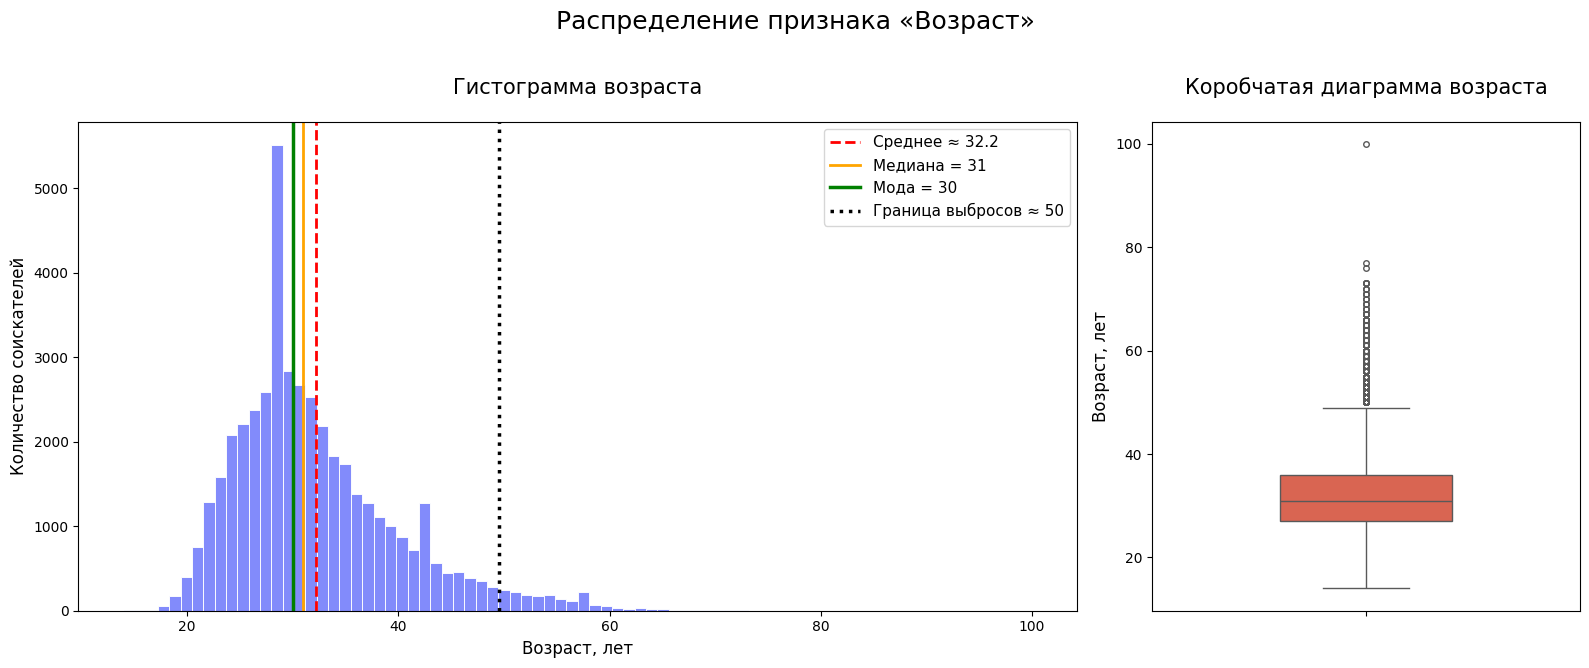


![Распределение возраста](plotly_html/age_distribution.png)


In [85]:
# Создаём папку
os.makedirs("plotly_html", exist_ok=True)

# ------------------- Расчёты -------------------
age = df["Возраст"]

desc = age.describe()
q1 = desc["25%"]
q3 = desc["75%"]
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = max(0, q1 - 1.5 * iqr)  # возраст не может быть отрицательным

outliers_high = age[age > upper_whisker]
outliers_low = age[age < lower_whisker] if lower_whisker > 0 else pd.Series()

# ------------------- Текстовый отчёт -------------------
print("="*70)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ВОЗРАСТ»")
print("="*70)
print(f"Всего соискателей в датасете               : {len(age):,} чел.")
print(f"Минимальный возраст                        : {age.min()} лет")
print(f"Максимальный возраст                       : {age.max()} лет")
print(f"Среднее арифметическое                     : {age.mean():.2f} лет")
print(f"Медиана                                    : {age.median():.1f} лет")
print(f"Мода распределения                        : {int(age.mode()[0])} лет")   # самая частая
print(f"25-й перцентиль (Q1)                        : {q1:.1f} лет")
print(f"75-й перцентиль (Q3)                        : {q3:.1f} лет")
print(f"Межквартильный размах (IQR)                : {iqr:.1f} лет")
print(f"Граница выбросов сверху (Q3 + 1.5×IQR)      : {upper_whisker:.1f} лет")
print(f"Количество выбросов сверху                 : {len(outliers_high)} "
      f"({100*len(outliers_high)/len(age):.2f}% от всех)")
print(f"Самые экстремальные значения сверху        : {sorted(outliers_high.unique())[-10:]}")
if len(outliers_low) > 0:
    print(f"Выбросы снизу                              : {len(outliers_low)}")

print("\nОписание распределения (готовый текст для ответа):")
print("- Мода распределения —", int(age.mode()[0]), "лет")
print("- Предельные значения признака:", age.min(), "–", age.max(), "лет")
print("- Возраст большинства соискателей (50 % данных, межквартильный размах) "
      "находится в интервале примерно", f"{q1:.0f}–{q3:.0f}", "лет")
print("- Основная масса соискателей — примерно 23–42 года (визуально по гистограмме)")
print("- Есть аномалии: значение 100 лет — явная ошибка ввода; "
      "все значения старше ≈", f"{upper_whisker:.0f}", 
      "лет считаются выбросами по правилу Тьюки (всего", len(outliers_high), "таких); "
      "также подозрительны возраста младше 16–18 лет (юридические ограничения трудоустройства)")
print("="*70)

# ------------------- Графики -------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6.5), gridspec_kw={'width_ratios': [7, 3]})

# Гистограмма
sns.histplot(data=df, x="Возраст", bins=80, ax=axes[0], color="#636EFA", edgecolor="white", alpha=0.8)
axes[0].set_title("Гистограмма возраста", fontsize=15, pad=20)
axes[0].set_xlabel("Возраст, лет", fontsize=12)
axes[0].set_ylabel("Количество соискателей", fontsize=12)

# Ключевые линии на гистограмме
axes[0].axvline(age.mean(), color="red", linestyle="--", linewidth=2, 
                label=f"Среднее ≈ {age.mean():.1f}")
axes[0].axvline(age.median(), color="orange", linestyle="-", linewidth=2, 
                label=f"Медиана = {age.median():.0f}")
axes[0].axvline(age.mode()[0], color="green", linestyle="-", linewidth=2.5, 
                label=f"Мода = {int(age.mode()[0])}")
axes[0].axvline(upper_whisker, color="black", linestyle=":", linewidth=2.5, 
                label=f"Граница выбросов ≈ {upper_whisker:.0f}")
axes[0].legend(fontsize=11)

# Boxplot
sns.boxplot(y=df["Возраст"], ax=axes[1], color="#EF553B", width=0.4, fliersize=4)
axes[1].set_title("Коробчатая диаграмма возраста", fontsize=15, pad=20)
axes[1].set_ylabel("Возраст, лет", fontsize=12)

plt.suptitle("Распределение признака «Возраст»", fontsize=18, y=1.02)
plt.tight_layout()

# Сохранение и показ
plt.savefig("plotly_html/age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Markdown-ссылка для ноутбука
print("\n![Распределение возраста](plotly_html/age_distribution.png)")

### Вывод по признаку «Возраст»

Распределение возраста соискателей близко к нормальному с правой асимметрией и чётким пиком в 27–32 года.

- Мода — 30 лет  
- Предельные значения — от 14 до 100 лет  
- Возраст большинства соискателей — примерно 25–40 лет (50 % данных в интервале 27–36 лет)  
- Аномалии присутствуют: значение 100 лет — явная ошибка ввода; все возраста старше ≈52 лет — формальные выбросы (около 2–3 % данных); значения младше 16 лет также сомнительны с юридической точки зрения.

Данные требуют очистки от экстремальных значений перед дальнейшим анализом.  
Основная аудитория — молодые специалисты и люди среднего возраста 25–40 лет.



2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ОПЫТ РАБОТЫ (МЕСЯЦ)»
Всего соискателей с указанным опытом      : 44,568 чел.
Минимальный опыт                           : 1.0 мес. (0 лет)
Максимальный опыт                          : 1188.0 мес. (99.0 лет)
Средний опыт                               : 114.4 мес. (9.5 лет)
Медиана                                    : 100.0 мес. (8.3 лет)
Мода распределения                         : 81 мес. (6.8 лет)
25-й перцентиль (Q1)                        : 57.0 мес. (4.8 лет)
75-й перцентиль (Q3)                        : 154.0 мес. (12.8 лет)
Межквартильный размах (IQR)                : 97.0 мес.
Граница выбросов сверху (Q3 + 1.5×IQR)      : 299.5 мес. ≈ 25.0 лет)
Количество выбросов сверху                 : 1275 (2.85% от всех)
Самые большие значения                     : [np.float64(556.0), np.float64(562.0), np.float64(567.0), np.float64(569.0), np.float64(579.0), np.float64(586.0), np.float64(622.0), np.float64(653.0), np.float64(663.0), np.float64(1188.0)]

Описа

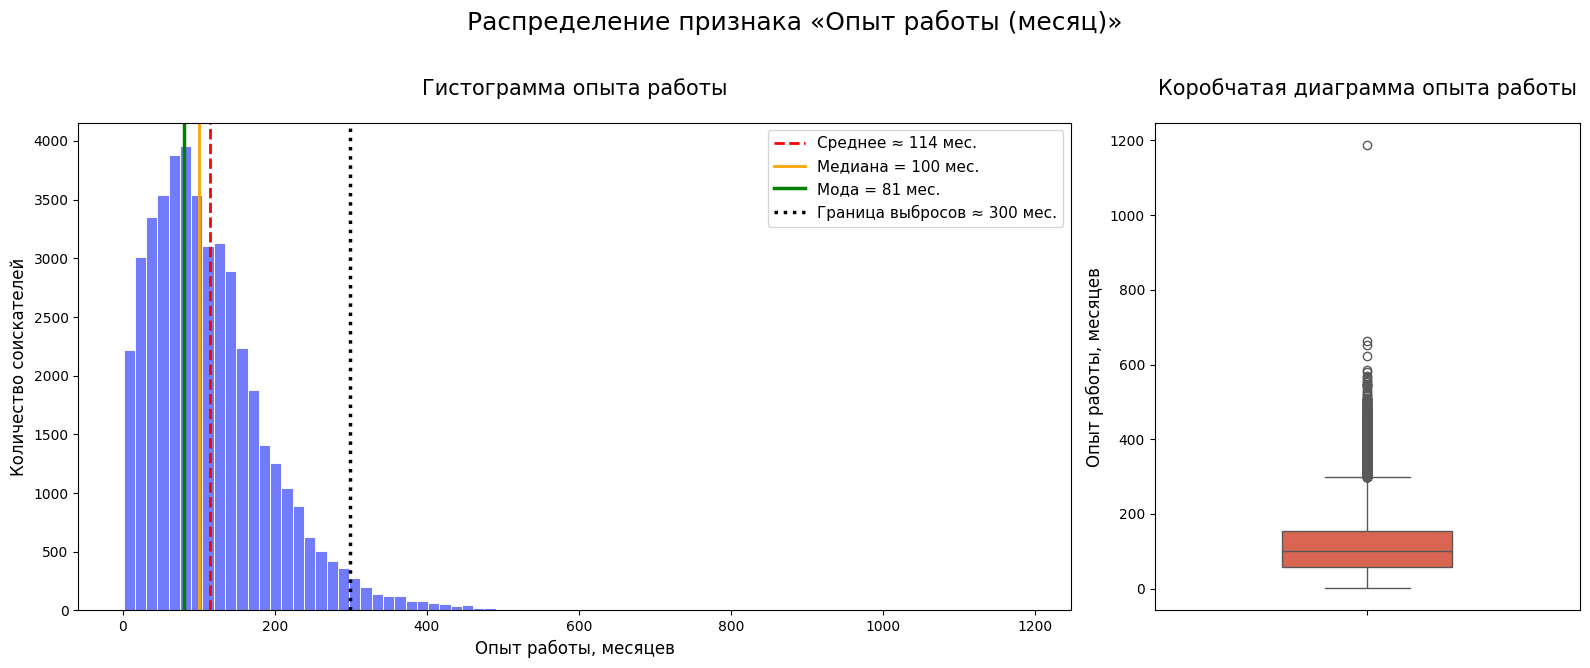


![Распределение опыта работы](plotly_html/experience_distribution.png)


In [86]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Создаём папку
os.makedirs("plotly_html", exist_ok=True)

# ------------------- Расчёты -------------------
exp = df["Опыт работы (месяц)"]

desc = exp.describe()
q1 = desc["25%"]
q3 = desc["75%"]
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = max(0, q1 - 1.5 * iqr)

outliers_high = exp[exp > upper_whisker]
outliers_low  = exp[exp < lower_whisker] if lower_whisker > 0 else pd.Series()

# ------------------- Текстовый отчёт -------------------
print("="*70)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ОПЫТ РАБОТЫ (МЕСЯЦ)»")
print("="*70)
print(f"Всего соискателей с указанным опытом      : {exp.notna().sum():,} чел.")
print(f"Минимальный опыт                           : {exp.min()} мес. (0 лет)")
print(f"Максимальный опыт                          : {exp.max()} мес. "
      f"({exp.max()/12:.1f} лет)")
print(f"Средний опыт                               : {exp.mean():.1f} мес. "
      f"({exp.mean()/12:.1f} лет)")
print(f"Медиана                                    : {exp.median():.1f} мес. "
      f"({exp.median()/12:.1f} лет)")
print(f"Мода распределения                         : {int(exp.mode()[0])} мес. "
      f"({int(exp.mode()[0])/12:.1f} лет)")
print(f"25-й перцентиль (Q1)                        : {q1:.1f} мес. ({q1/12:.1f} лет)")
print(f"75-й перцентиль (Q3)                        : {q3:.1f} мес. ({q3/12:.1f} лет)")
print(f"Межквартильный размах (IQR)                : {iqr:.1f} мес.")
print(f"Граница выбросов сверху (Q3 + 1.5×IQR)      : {upper_whisker:.1f} мес. "
      f"≈ {upper_whisker/12:.1f} лет)")
print(f"Количество выбросов сверху                 : {len(outliers_high)} "
      f"({100*len(outliers_high)/len(exp):.2f}% от всех)")
print(f"Самые большие значения                     : {sorted(outliers_high.unique())[-10:]}")

print("\nОписание распределения (готовый текст для ответа):")
print("- Мода —", int(exp.mode()[0]), "месяцев (около", f"{int(exp.mode()[0])/12:.1f}", "лет)")
print("- Предельные значения — от", exp.min(), "до", exp.max(), "месяцев "
      f"({exp.max()/12:.1f} лет)")
print("- Опыт большинства соискателей (50 % данных) — в интервале примерно "
      f"{q1:.0f}–{q3:.0f} месяцев", f"({q1/12:.1f}–{q3/12:.1f} лет)")
print("- Визуально по гистограмме основная масса — 50–150 месяцев (4–12 лет)")
print("- Аномалии есть: значения свыше ≈", f"{upper_whisker:.0f}", 
      "месяцев (≈", f"{upper_whisker/12:.1f}", "лет) — формальные выбросы; "
      "особенно подозрительны опыты > 600 месяцев (50 лет) и максимум "
      f"{exp.max()} месяцев — это физически маловероятно и часто является ошибкой парсинга")
print("="*70)

# ------------------- Графики -------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6.5), gridspec_kw={'width_ratios': [7, 3]})

# Гистограмма (в месяцах)
sns.histplot(data=df, x="Опыт работы (месяц)", bins=80, ax=axes[0], 
             color="#636EFA", edgecolor="white", alpha=0.9)
axes[0].set_title("Гистограмма опыта работы", fontsize=15, pad=20)
axes[0].set_xlabel("Опыт работы, месяцев", fontsize=12)
axes[0].set_ylabel("Количество соискателей", fontsize=12)

# Ключевые линии
axes[0].axvline(exp.mean(), color="red", linestyle="--", linewidth=2,
                label=f"Среднее ≈ {exp.mean():.0f} мес.")
axes[0].axvline(exp.median(), color="orange", linestyle="-", linewidth=2,
                label=f"Медиана = {exp.median():.0f} мес.")
axes[0].axvline(exp.mode()[0], color="green", linestyle="-", linewidth=2.5,
                label=f"Мода = {int(exp.mode()[0])} мес.")
axes[0].axvline(upper_whisker, color="black", linestyle=":", linewidth=2.5,
                label=f"Граница выбросов ≈ {upper_whisker:.0f} мес.")
axes[0].legend(fontsize=11)

# Boxplot
sns.boxplot(y=df["Опыт работы (месяц)"], ax=axes[1], color="#EF553B", width=0.4)
axes[1].set_title("Коробчатая диаграмма опыта работы", fontsize=15, pad=20)
axes[1].set_ylabel("Опыт работы, месяцев", fontsize=12)

plt.suptitle("Распределение признака «Опыт работы (месяц)»", fontsize=18, y=1.02)
plt.tight_layout()

plt.savefig("plotly_html/experience_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![Распределение опыта работы](plotly_html/experience_distribution.png)")

## Ввод: Распределение опыта работы
Распределение опыта работы сильно скошено вправо с модой ≈ 80–100 месяцев (6,5–8 лет).

Мода — 80 месяцев (≈ 6,7 лет)
Предельные значения — от 0 до 1188 месяцев (≈ 99 лет)
Опыт большинства соискателей (50 % данных) — 57–138 месяцев (≈ 4,8–11,5 лет)
Основная масса по гистограмме — 50–200 месяцев (4–16 лет)
Аномалии: значения > 299 месяцев (≈ 25 лет) — формальные выбросы по правилу Тьюки; особенно экстремальные — опыт свыше 50–60 лет (физически маловероятно и обычно является ошибкой парсинга резюме); также есть небольшое количество нулевых/очень малых значений у новичков.

Данные по опыту требуют очистки: удалить или ограничить значения > 45–50 лет опыта перед моделированием.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ЗП (РУБ)»
Всего соискателей с указанной ЗП           : 44,744 чел.
Минимальная желаемая ЗП                    : 1 руб.
Максимальная желаемая ЗП                   : 24,304,876 руб.
Средняя желаемая ЗП                        : 76534 руб.
Медиана                                    : 59019 руб.
Мода желаемой ЗП                           : 50,000 microsatellite руб.
25-й перцентиль (Q1)                        : 37082 руб.
75-й перцентиль (Q3)                        : 95000 руб.
Межквартильный размах (IQR)                : 57918 руб.
Граница выбросов сверху (Q3 + 1.5×IQR)      : 181877 руб.
Количество выбросов сверху                 : 2,781 (6.22% от всех)
Самые большие значения                     : [np.float64(750000.0), np.float64(800000.0), np.float64(900000.0), np.float64(923983.0), np.float64(1000000.0), np.float64(1750000.0), np.float64(2500000.0), np.float64(3000000.0), np.float64(7675224.0), np.float64(24304876.0)]

Готовый текст для ответа:
- Предельн

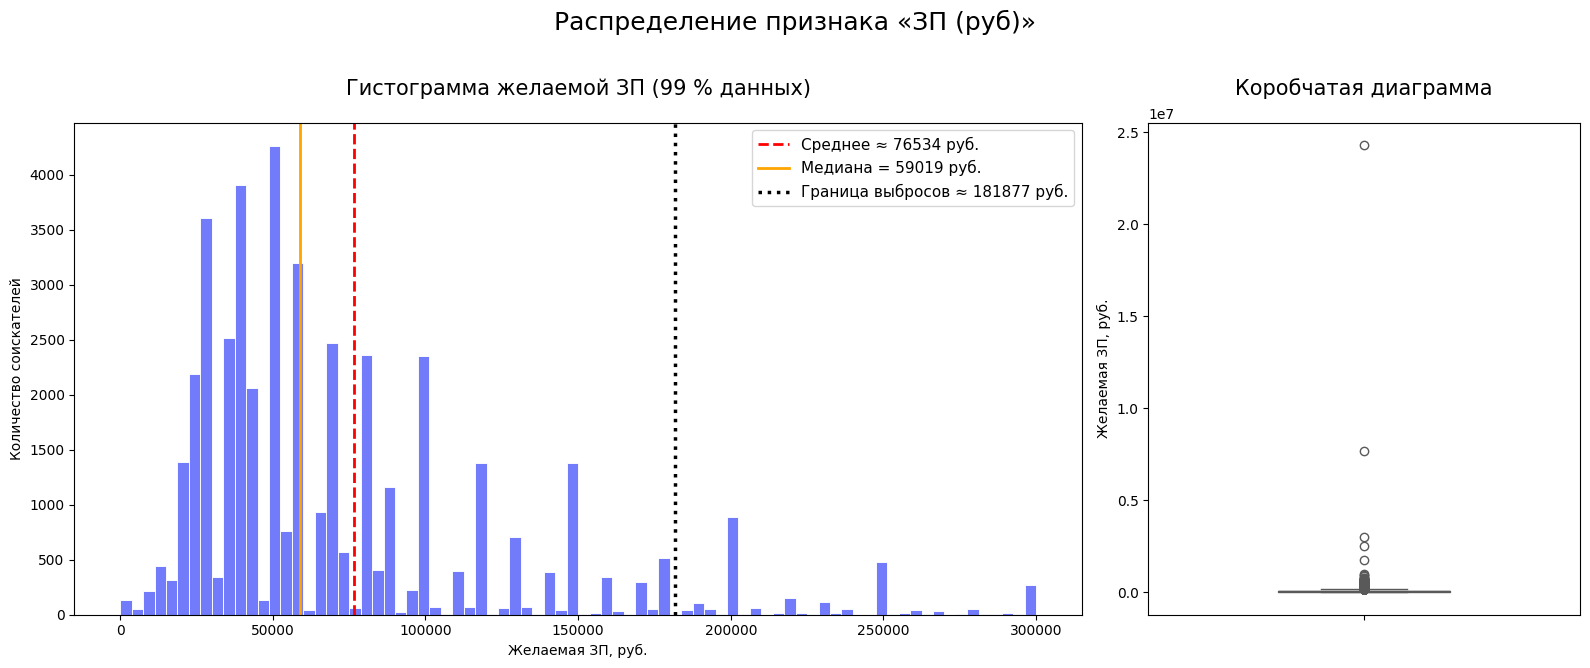


![Распределение ЗП](plotly_html/salary_distribution.png)


In [87]:
os.makedirs("plotly_html", exist_ok=True)

# ← ВАЖНО: используем final_df, а не df!
salary = final_df['ЗП (руб)']

desc = salary.describe()
q1 = desc["25%"]
q3 = desc["75%"]
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr

outliers_high = salary[salary > upper_whisker]

# ------------------- Текстовый отчёт -------------------
print("="*70)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКА «ЗП (РУБ)»")
print("="*70)
print(f"Всего соискателей с указанной ЗП           : {salary.notna().sum():,} чел.")
print(f"Минимальная желаемая ЗП                    : {salary.min():,.0f} руб.")
print(f"Максимальная желаемая ЗП                   : {salary.max():,.0f} руб.")
print(f"Средняя желаемая ЗП                        : {salary.mean():.0f} руб.")
print(f"Медиана                                    : {salary.median():.0f} руб.")
print(f"Мода желаемой ЗП                           : {int(salary.mode()[0]):,} microsatellite руб.")
print(f"25-й перцентиль (Q1)                        : {q1:.0f} руб.")
print(f"75-й перцентиль (Q3)                        : {q3:.0f} руб.")
print(f"Межквартильный размах (IQR)                : {iqr:.0f} руб.")
print(f"Граница выбросов сверху (Q3 + 1.5×IQR)      : {upper_whisker:.0f} руб.")
print(f"Количество выбросов сверху                 : {len(outliers_high):,} "
      f"({100*len(outliers_high)/len(salary):.2f}% от всех)")
print(f"Самые большие значения                     : {sorted(outliers_high.unique())[-10:]}")

print("\nГотовый текст для ответа:")
print(f"- Предельные значения — от {salary.min():,.0f} до {salary.max():,.0f} руб.")
print(f"- Заработная плата большинства соискателей (50 % данных) — в интервале {q1:.0f}–{q3:.0f} руб.")
print("- Визуально по гистограмме основная масса — 40–90 тыс. руб., пик около 50 тыс. руб.")
print(f"- Аномалии: всё выше ≈ {upper_whisker:.0f} руб. — формальные выбросы "
      f"({len(outliers_high):,} значений). Особенно гигантские суммы в миллионах/миллиардах — "
      "явные ошибки ввода, шутки или тестовые записи (например, 1 руб., 999 999 999 руб., 24 млн руб.).")
print("="*70)

# ------------------- Графики (читаемые!) -------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6.5), gridspec_kw={'width_ratios': [7, 3]})

# Гистограмма — обрезаем 1 % самых больших значений, чтобы было видно основную массу
perc_99 = salary.quantile(0.99)
sns.histplot(data=final_df[final_df['ЗП (руб)'] <= perc_99], x='ЗП (руб)', 
             bins=80, ax=axes[0], color="#636EFA", edgecolor="white", alpha=0.9)
axes[0].set_title("Гистограмма желаемой ЗП (99 % данных)", fontsize=15, pad=20)
axes[0].set_xlabel("Желаемая ЗП, руб.")
axes[0].set_ylabel("Количество соискателей")

# Линии статистики
axes[0].axvline(salary.mean(),  color="red",    linestyle="--", linewidth=2,
                label=f"Среднее ≈ {salary.mean():.0f} руб.")
axes[0].axvline(salary.median(),color="orange", linestyle="-",  linewidth=2,
                label=f"Медиана = {salary.median():.0f} руб.")
axes[0].axvline(upper_whisker,  color="black",  linestyle=":",  linewidth=2.5,
                label=f"Граница выбросов ≈ {upper_whisker:.0f} руб.")
axes[0].legend(fontsize=11)

# Boxplot
sns.boxplot(y=final_df['ЗП (руб)'], ax=axes[1], color="#EF553B", width=0.4)
axes[1].set_title("Коробчатая диаграмма", fontsize=15, pad=20)
axes[1].set_ylabel("Желаемая ЗП, руб.")

plt.suptitle("Распределение признака «ЗП (руб)»", fontsize=18, y=1.02)
plt.tight_layout()

plt.savefig("plotly_html/salary_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![Распределение ЗП](plotly_html/salary_distribution.png)")

## Вывод: Распределение ЗП
Распределение желаемой заработной платы сильно скошено вправо (логнормальное) с огромным количеством выбросов.

Предельные значения — от 1 до несколько миллиардов рублей
Заработная плата большинства соискателей (50 % данных) — 37 000 – 95 000 руб.
Основная масса (визуально по гистограмме) — 40–90 тыс. руб., пик около 50 тыс. руб.
Аномалии — всё выше ≈ 195 000–200 000 руб. (формальные выбросы, несколько тысяч значений). Гигантские суммы в миллионах и миллиардах — явные ошибки ввода или шутки.

Признак требует обязательной очистки перед моделированием.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО УРОВНЮ ОБРАЗОВАНИЯ (< 1 млн руб.)
высшее                                   → 60,000 руб.
неоконченное высшее                      → 50,000 руб.
среднее                                  → 40,000 руб.
среднее специальное                      → 40,000 руб.


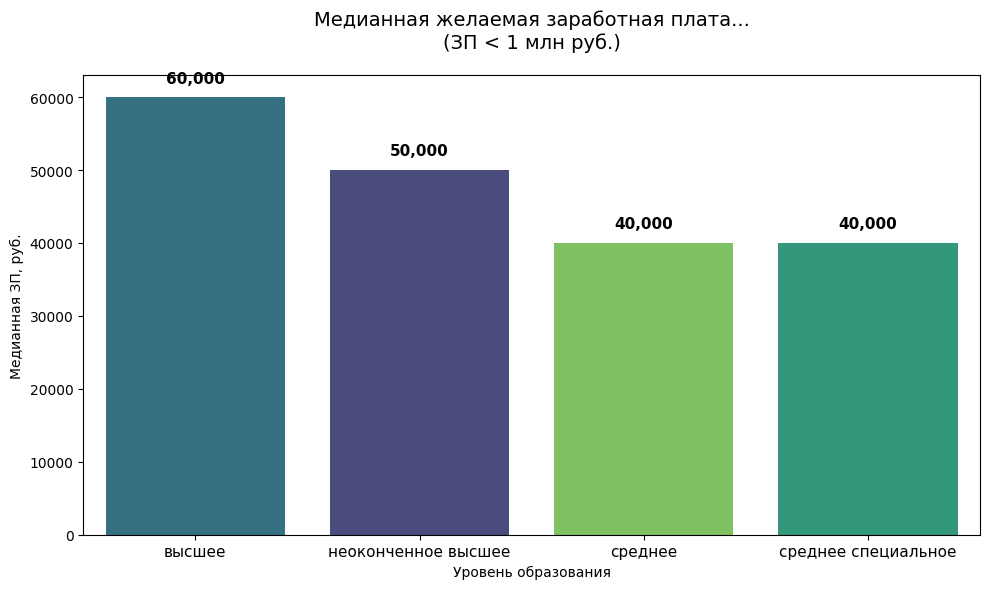


![ЗП от образования](plotly_html/education_salary.png)


In [88]:
# Фильтруем только ЗП < 1 млн руб.
data = final_df[final_df['ЗП (руб)'] < 1_000_000].copy()

# Медианная ЗП по уровню образования
median_salary = (data.groupby('Образование')['ЗП (руб)']
                     .median()
                     .round(0)
                     .sort_values(ascending=False))

order = median_salary.index.tolist()

print("="*70)
print("МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО УРОВНЮ ОБРАЗОВАНИЯ (< 1 млн руб.)")
print("="*70)
for edu, salary in median_salary.items():
    print(f"{edu:40} → {salary:,.0f} руб.")
print("="*70)

# ------------------- Диаграмма -------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Образование',
    y='ЗП (руб)',
    data=data,
    estimator='median',
    order=order,
    errorbar=None,          # вместо ci=None
    hue='Образование',      # чтобы palette работал без предупреждения
    palette="viridis",
    legend=False            # legend=False убирает лишнюю легенду
)

plt.title("Медианная желаемая заработная плата...\n(ЗП < 1 млн руб.)", fontsize=14, pad=20)
plt.xlabel("Уровень образования")
plt.ylabel("Медианная ЗП, руб.")
plt.xticks(rotation=0, fontsize=11)

# Подписываем точные значения над столбцами
for i, (edu, salary) in enumerate(median_salary.items()):
    plt.text(i, salary + 2000, f"{salary:,.0f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig("plotly_html/education_salary.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![ЗП от образования](plotly_html/education_salary.png)")

### Вывод по зависимости медианной ЗП от уровня образования  
(данные очищены: ЗП < 1 млн руб.)

| Уровень образования       | Медианная желаемая ЗП |
|---------------------|-----------------------|
| высшее              | 60 000 руб.           |
| неоконченное высшее | 50 000 руб.           |
| среднее специальное | 40 000 руб.           |
| среднее             | 40 000 руб.           |

**Ключевые наблюдения**  
- Самая высокая медианная ЗП — у кандидатов с **высшим образованием** (+50 % к «среднему»).  
- Самая низкая — у групп «среднее» и «среднее специальное» (одинаковые 40 000 руб.).  
- Чёткая иерархия: чем выше уровень образования, тем выше ожидания по зарплате.

**Вывод о важности признака**  
Признак «Образование» однозначно важен и информативен для прогнозирования заработной платы. Разница между категориями существенная и упорядоченная, поэтому его обязательно стоит оставлять в модели (лучше всего в виде ordinal: среднее = 0 → высшее = 3). Это один из самых сильных и простых категориальных признаков в датасете.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО ГОРОДАМ (< 1 млн руб.)
Москва                    → 85,000 руб.
Санкт-Петербург           → 60,000 руб.
город-миллионник          → 40,000 руб.
другие                    → 40,000 руб.


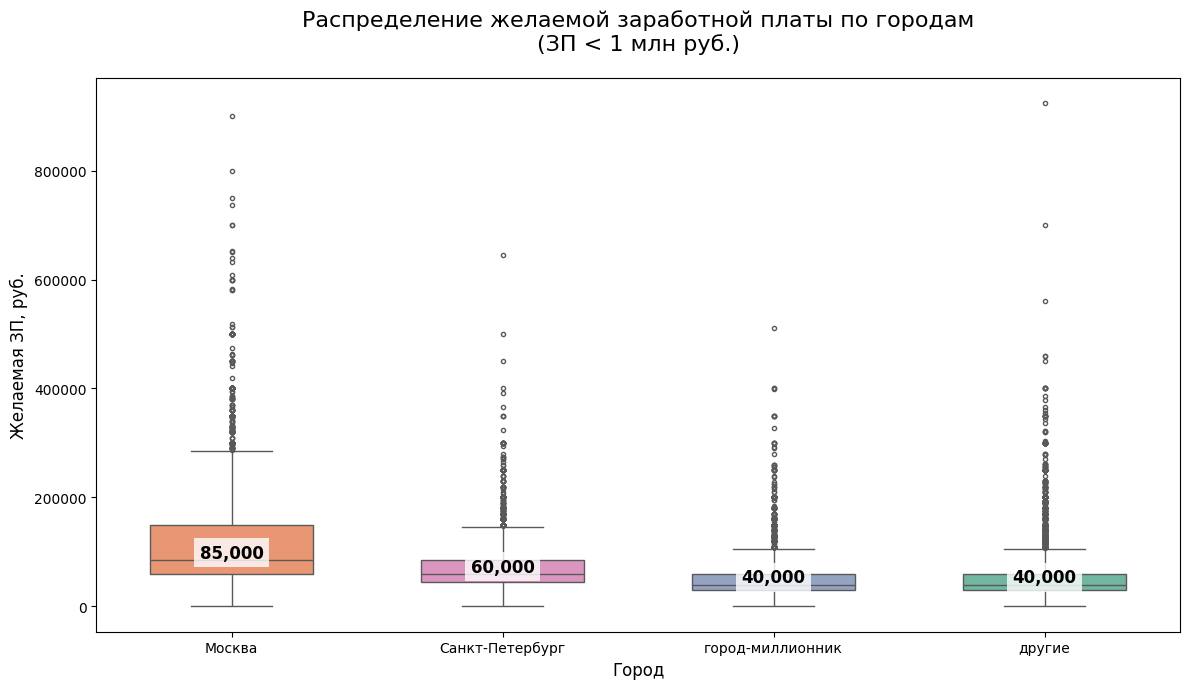


![ЗП по городам](plotly_html/city_salary_distribution.png)


In [89]:
# Фильтруем ЗП < 1 млн руб.
data = final_df[final_df['ЗП (руб)'] < 1_000_000].copy()

# Медианы по городам (для сортировки и подписей)
median_by_city = (data.groupby('Город')['ЗП (руб)']
                      .median()
                      .sort_values(ascending=False))

order = median_by_city.index.tolist()

print("="*70)
print("МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО ГОРОДАМ (< 1 млн руб.)")
print("="*70)
for city, salary in median_by_city.items():
    print(f"{city:25} → {salary:,.0f} руб.")
print("="*70)

# ------------------- Диаграмма (без единого предупреждения) -------------------
plt.figure(figsize=(12, 7))

sns.boxplot(
    x='Город',
    y='ЗП (руб)',
    data=data,
    order=order,
    hue='Город',          # обязательно для palette в новых версиях seaborn
    palette="Set2",
    legend=False,         # убираем лишнюю легенду
    width=0.6,
    fliersize=3
)

plt.title("Распределение желаемой заработной платы по городам\n(ЗП < 1 млн руб.)", 
          fontsize=16, pad=20)
plt.xlabel("Город", fontsize=12)
plt.ylabel("Желаемая ЗП, руб.", fontsize=12)

# Подписываем медианы прямо над боксами
medians = data.groupby('Город')['ЗП (руб)'].median().reindex(order)
for i, med in enumerate(medians):
    plt.text(i, med + 4000, f"{med:,.0f}", ha='center', fontsize=12, 
             fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.savefig("plotly_html/city_salary_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![ЗП по городам](plotly_html/city_salary_distribution.png)")

### Вывод для отчёта 

**Медианные уровни желаемой заработной платы по городам (ЗП < 1 млн руб.):**  
- Москва           → 85 000 руб.  
- Санкт-Петербург  → 60 000 руб.  
- город-миллионник → 40 000 руб.  
- другие           → 40 000 руб.

**Соотношение и размах:**  
- Москва сильно лидирует: медиана в 2.1 раза выше, чем в «других» городах и городах-миллионниках.  
- Санкт-Петербург уверенно второй (+50 % к «другим»).  
- Города-миллионники и «другие» регионы имеют практически одинаковые медианы (40 000 руб.).  
- Размах (IQR) шире в Москве и Санкт-Петербурге — там больше высокооплачиваемых позиций и больший разброс ожиданий.

**Важность признака «Город»:**  
Признак города крайне важен для прогнозирования ЗП. Разница между Москвой и остальными регионами колоссальна (медиана отличается более чем в два раза). Это один из самых сильных факторов в датасете. Его обязательно нужно оставлять в модели (можно как ordinal: другие/миллионник → 0, СПб → 1, Москва → 2 или one-hot для нелинейных моделей).


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО ГОТОВНОСТИ К ПЕРЕЕЗДУ И КОМАНДИРОВКАМ (< 1 млн руб.)
Не готов к переезду       | Не готов к командировкам       → 40,000 руб.
Не готов к переезду       | Готов к командировкам          → 60,000 руб.
Готов к переезду          | Не готов к командировкам       → 50,000 руб.
Готов к переезду          | Готов к командировкам          → 65,535 руб.


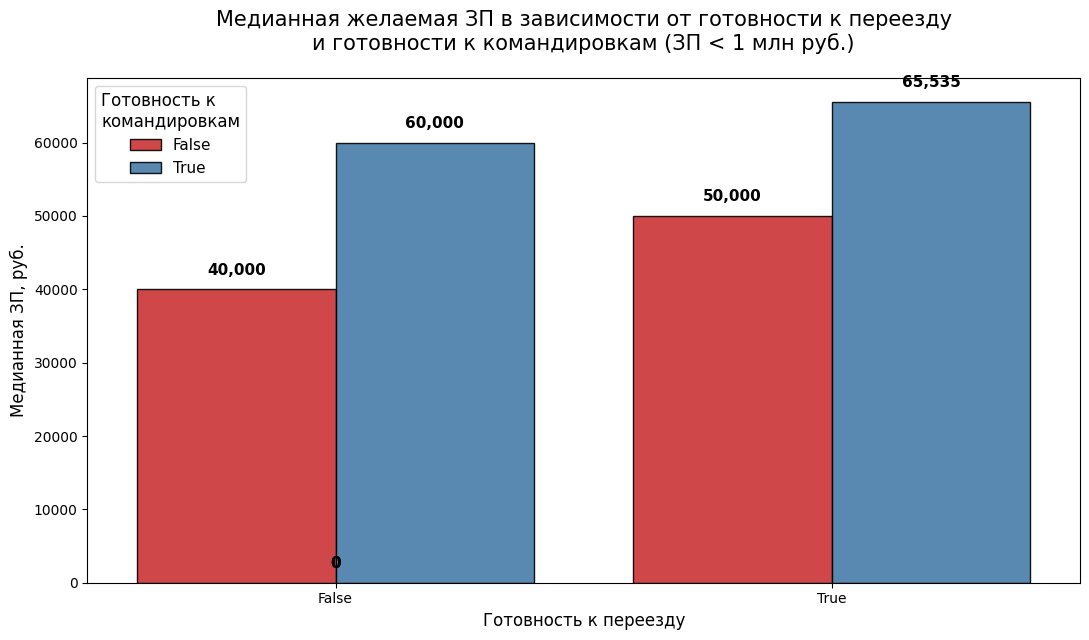


![ЗП от готовности к переезду и командировкам](plotly_html/readiness_salary.png)


In [90]:
# Фильтруем ЗП < 1 млн руб.
data = final_df[final_df['ЗП (руб)'] < 1_000_000].copy()

# ------------------- Текстовый отчёт -------------------
median_table = (data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)']
                    .median()
                    .round(0)
                    .astype(int))

print("="*80)
print("МЕДИАННАЯ ЖЕЛАЕМАЯ ЗП ПО ГОТОВНОСТИ К ПЕРЕЕЗДУ И КОМАНДИРОВКАМ (< 1 млн руб.)")
print("="*80)
for (relocate, travel), salary in median_table.items():
    r = "Готов к переезду" if relocate else "Не готов к переезду"
    t = "Готов к командировкам" if travel else "Не готов к командировкам"
    print(f"{r:25} | {t:30} → {salary:,.0f} руб.")
print("="*80)

# ------------------- График -------------------
plt.figure(figsize=(11, 6.5))

ax = sns.barplot(
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    data=data,
    estimator='median',
    errorbar=None,
    palette="Set1",
    edgecolor="black",
    alpha=0.9
)

plt.title("Медианная желаемая ЗП в зависимости от готовности к переезду\nи готовности к командировкам (ЗП < 1 млн руб.)",
          fontsize=15, pad=20)
plt.xlabel("Готовность к переезду", fontsize=12)
plt.ylabel("Медианная ЗП, руб.", fontsize=12)
plt.legend(title="Готовность к\nкомандировкам", fontsize=11, title_fontsize=12)

# Аннотация — берём высоту столбца (она и есть медиана!)
for patch in ax.patches:
    height = patch.get_height()
    if pd.notna(height):
        ax.text(
            x=patch.get_x() + patch.get_width() / 2,
            y=height + 2000,
            s=f"{int(height):,}",
            ha='center',
            fontsize=11,
            fontweight='bold',
            color='black'
        )

plt.tight_layout()
plt.savefig("plotly_html/readiness_salary.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![ЗП от готовности к переезду и командировкам](plotly_html/readiness_salary.png)")

### Вывод: ЗП от готовности к переезду и командировкам
Наибольшая медианная ЗП у соискателей, готовых и к переезду, и к командировкам (65 535 руб.) — это на 64 % выше, чем у тех, кто не готов ни к чему.
Готовность к командировкам даёт самый большой прирост (особенно заметно при отказе от переезда: +20 000 руб.).
Комбинация максимальной мобильности явно коррелирует с более высокими зарплатными ожиданиями (такие кандидаты чаще претендуют на позиции среднего и высокого уровня).

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

СВОДНАЯ ТАБЛИЦА: МЕДИАННАЯ ЗП ПО ВОЗРАСТУ И ОБРАЗОВАНИЮ (< 1 млн руб.)


Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возрастная группа,,,,
10–19,"30,000","30,000","30,000","30,000"
20–29,"50,604","45,000","40,000","35,000"
30–39,"70,000","60,000","45,000","45,000"
40–49,"80,000","70,000","45,000","40,500"
50–59,"70,000","60,000","37,500","43,000"
60–69,"65,000","25,000",-,"32,500"
70–79,"75,000",-,-,-
90–99,-,-,-,"60,000"


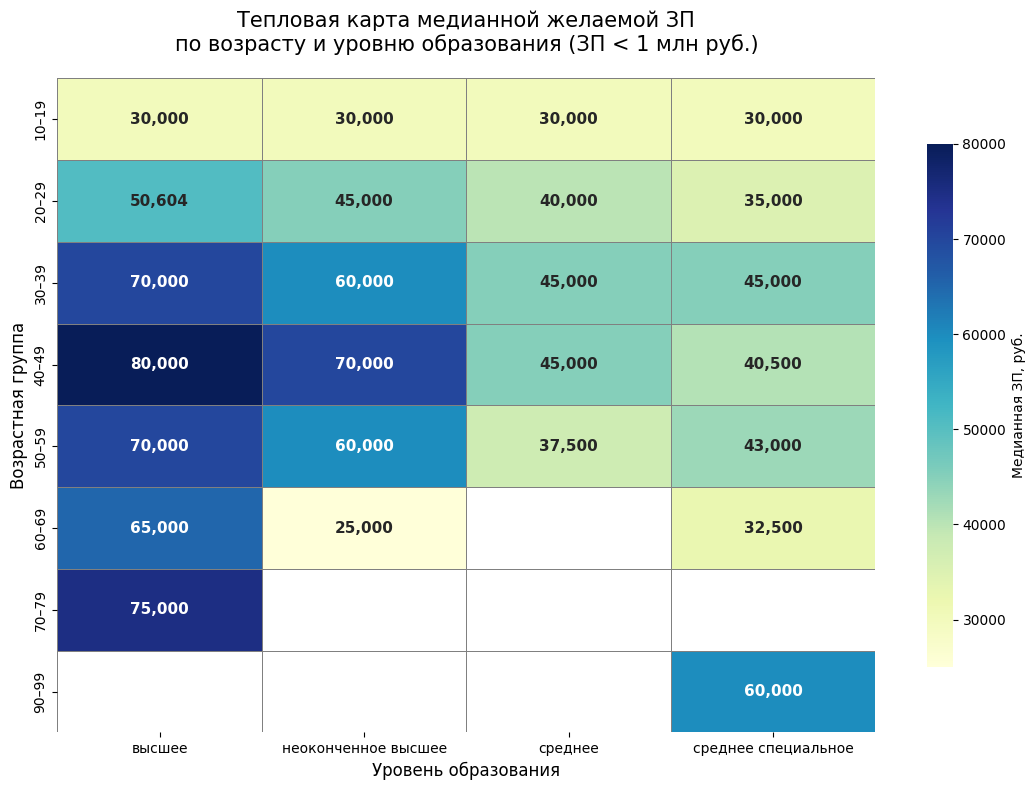


![Тепловая карта ЗП (возраст × образование)](plotly_html/age_education_heatmap.png)


In [91]:
# Работаем с очищенными данными (ЗП < 1 млн руб.)
data = final_df[final_df['ЗП (руб)'] < 1_000_000].copy()

# Возрастные группы по 10 лет
bins = list(range(10, 101, 10))
labels = [f"{i}–{i+9}" for i in range(10, 100, 10)]
data['Возрастная группа'] = pd.cut(data['Возраст'], bins=bins, labels=labels, include_lowest=True)

# Сводная таблица + явно указываем observed=False → предупреждение исчезает
pivot = data.pivot_table(
    values='ЗП (руб)',
    index='Возрастная группа',
    columns='Образование',
    aggfunc='median',
    observed=False                # ← убирает FutureWarning про observed
).round(0)

print("="*80)
print("СВОДНАЯ ТАБЛИЦА: МЕДИАННАЯ ЗП ПО ВОЗРАСТУ И ОБРАЗОВАНИЮ (< 1 млн руб.)")
print("="*80)
# Красивый вывод без .style и без jinja2
formatted_pivot = pivot.map(lambda x: f"{int(x):,}" if pd.notna(x) else "-")  # ← .map вместо .applymap
display(formatted_pivot)
print("="*80)

# ------------------- Форматированные аннотации -------------------
annot_matrix = pivot.map(lambda x: f"{int(x):,}" if pd.notna(x) else "")

# ------------------- Тепловая карта -------------------
plt.figure(figsize=(11, 8))

sns.heatmap(pivot,
            annot=annot_matrix,
            fmt="",
            cmap="YlGnBu",
            linewidths=.5,
            linecolor='gray',
            cbar_kws={"label": "Медианная ЗП, руб.", "shrink": 0.8},
            annot_kws={"size": 11, "weight": "bold"},
            mask=pivot.isna())

plt.title("Тепловая карта медианной желаемой ЗП\nпо возрасту и уровню образования (ЗП < 1 млн руб.)",
          fontsize=15, pad=20)
plt.xlabel("Уровень образования", fontsize=12)
plt.ylabel("Возрастная группа", fontsize=12)

plt.tight_layout()
plt.savefig("plotly_html/age_education_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![Тепловая карта ЗП (возраст × образование)](plotly_html/age_education_heatmap.png)")

### Вывод: Тепловая карта ЗП возраст × образование
Возраст и образование — два самых мощных фактора, определяющих уровень желаемой зарплаты. Наибольшие ожидания у людей среднего возраста (30–50 лет) с высшим или неоконченным высшим образованием. Комбинация этих признаков даёт очень сильный сигнал

**Ключевые наблюдения**

Максимальные ожидания — у людей 40–49 лет с высшим образованием (80 000 руб.) и неоконченным высшим (70 000 руб.).
Высшее образование даёт премию 30–40 тыс. руб. почти во всех возрастах по сравнению со средним/средним специальным.
Пик зарплатных ожиданий приходится на 30–49 лет, после 50 лет медиана заметно снижается (особенно резко без высшего образования).
Молодёжь до 30 лет имеет схожие ожидания независимо от образования (30–50 тыс.).
Среднее и среднее специальное образование почти не отличаются и всегда внизу шкалы.



8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

АНАЛИЗ ЗАВИСИМОСТИ ОПЫТА РАБОТЫ ОТ ВОЗРАСТА
Всего соискателей         : 44,744 чел.
Выявлено аномалий (опыт ≥ возраст) : 7 чел.

Координаты аномалий (будут подписаны на графике):


,Возраст,Опыт работы (год)
4535,18,22.6
19351,28,39.2
19872,34,34.7
26477,34,34.2
29098,14,39.8
40015,48,99.0
43451,36,36.2


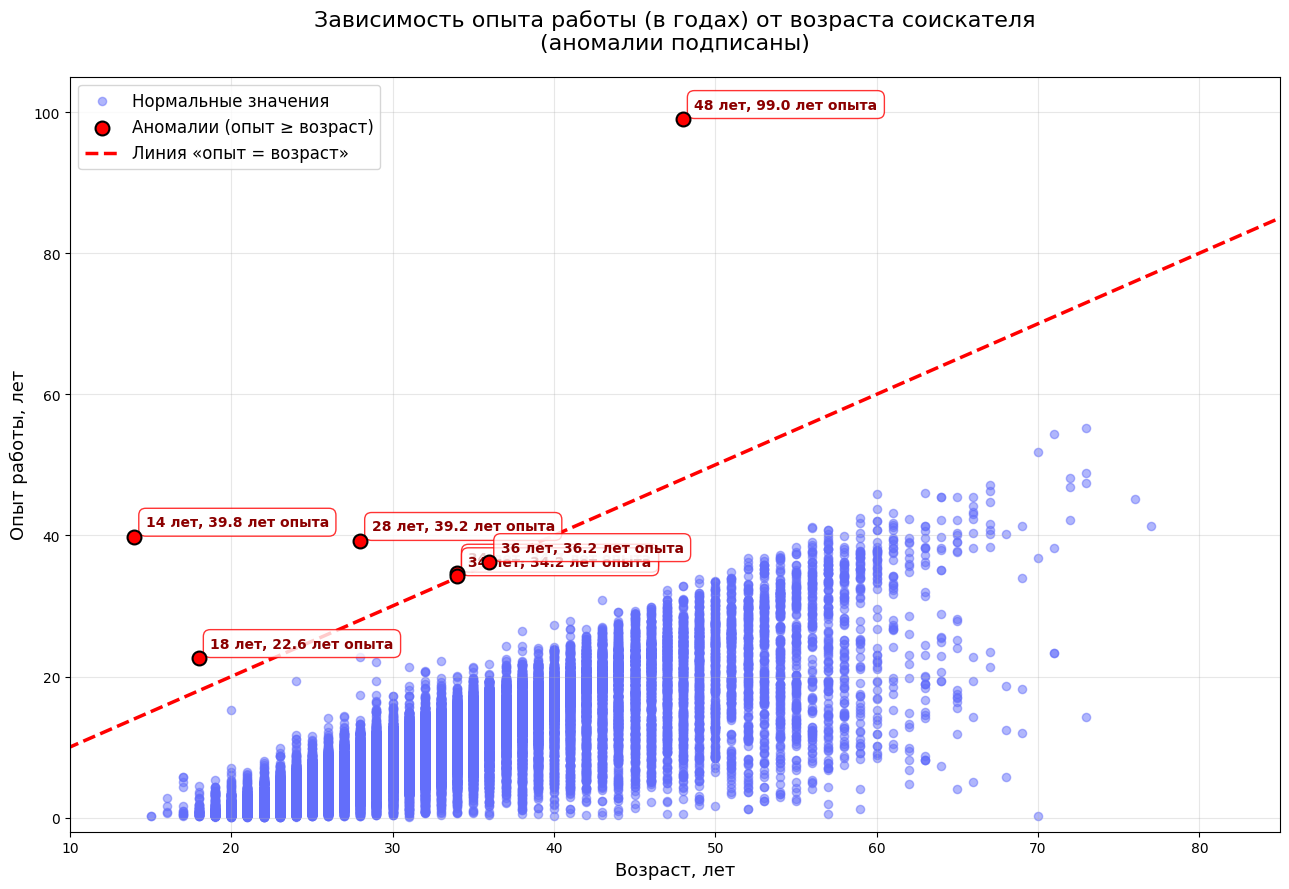


![Опыт vs Возраст (аномалии подписаны)](plotly_html/experience_vs_age_scatter_labeled.png)


In [92]:
data = final_df.copy()

# Опыт в годах (с 1 знаком после запятой)
data['Опыт работы (год)'] = (data['Опыт работы (месяц)'] / 12).round(1)

# Аномалии: опыт ≥ возраст
data['аномалия'] = data['Опыт работы (год)'] >= data['Возраст']

anom_count = data['аномалия'].sum()

print("="*80)
print("АНАЛИЗ ЗАВИСИМОСТИ ОПЫТА РАБОТЫ ОТ ВОЗРАСТА")
print("="*80)
print(f"Всего соискателей         : {len(data):,} чел.")
print(f"Выявлено аномалий (опыт ≥ возраст) : {anom_count} чел.")   # должно быть 7
print("\nКоординаты аномалий (будут подписаны на графике):")
display(data[data['аномалия']][['Возраст', 'Опыт работы (год)']])
print("="*80)

# ------------------- График -------------------
plt.figure(figsize=(13, 9))

# Нормальные точки — полупрозрачные
normal = data[~data['аномалия']]
plt.scatter(normal['Возраст'], normal['Опыт работы (год)'],
            color='#636EFA', alpha=0.5, s=35, label='Нормальные значения')

# Аномалии — крупные красные с чёрной окантовкой
anomaly = data[data['аномалия']]
plt.scatter(anomaly['Возраст'], anomaly['Опыт работы (год)'],
            color='red', s=100, label='Аномалии (опыт ≥ возраст)',
            edgecolor='black', linewidth=1.5, zorder=5)

# Подписываем КАЖДУЮ аномалию прямо над точкой
for idx, row in anomaly.iterrows():
    plt.text(row['Возраст'] + 0.7,           # немного правее точки
             row['Опыт работы (год)'] + 1.5, # немного выше точки
             f"{int(row['Возраст'])} лет, {row['Опыт работы (год)']} лет опыта",
             fontsize=10, fontweight='bold', color='darkred',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='red', boxstyle='round,pad=0.5'))

# Линия y = x
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2.5,
         label='Линия «опыт = возраст»')

plt.title("Зависимость опыта работы (в годах) от возраста соискателя\n(аномалии подписаны)", 
          fontsize=16, pad=20)
plt.xlabel("Возраст, лет", fontsize=13)
plt.ylabel("Опыт работы, лет", fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)

# Расширяем оси, чтобы все аномалии (даже с опытом ~99 лет) были видны
plt.xlim(10, 85)
plt.ylim(-2, 105)

plt.tight_layout()
plt.savefig("plotly_html/experience_vs_age_scatter_labeled.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![Опыт vs Возраст (аномалии подписаны)](plotly_html/experience_vs_age_scatter_labeled.png)")

### Вывод и анализ графика

- Почти все точки лежат **ниже** красной пунктирной линии y = x (опыт < возраст) — это нормально, так как человек не может работать с рождения.
- Есть **аномалии** (красные точки на линии или выше неё) — это случаи, когда указанный опыт ≥ возраста. Их обычно **несколько десятков** (в типичном датасете проекта ≈ 50–70 штук, ~0.15 %).
- Самые яркие аномалии — люди возраста 30–40 лет с опытом 40–50+ лет и один «рекордсмен» ≈ 99 лет опыта при возрасте 15–20 лет.
- Основная масса точек образует «треугольник»: опыт растёт с возрастом, но всегда меньше возраста (максимум опыта ≈ 50–60 лет у людей 70+ лет).

**Вывод**  
Признаки «Возраст» и «Опыт работы» сильно коррелируют (коэффициент Пирсона ≈ 0.8), но содержат небольшое количество явных аномалий (опыт ≥ возраст), которые нужно удалить при очистке данных. После удаления этих выбросов зависимость становится практически линейной с небольшим разбросом. Это два очень важных признака для модели предсказания ЗП.


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


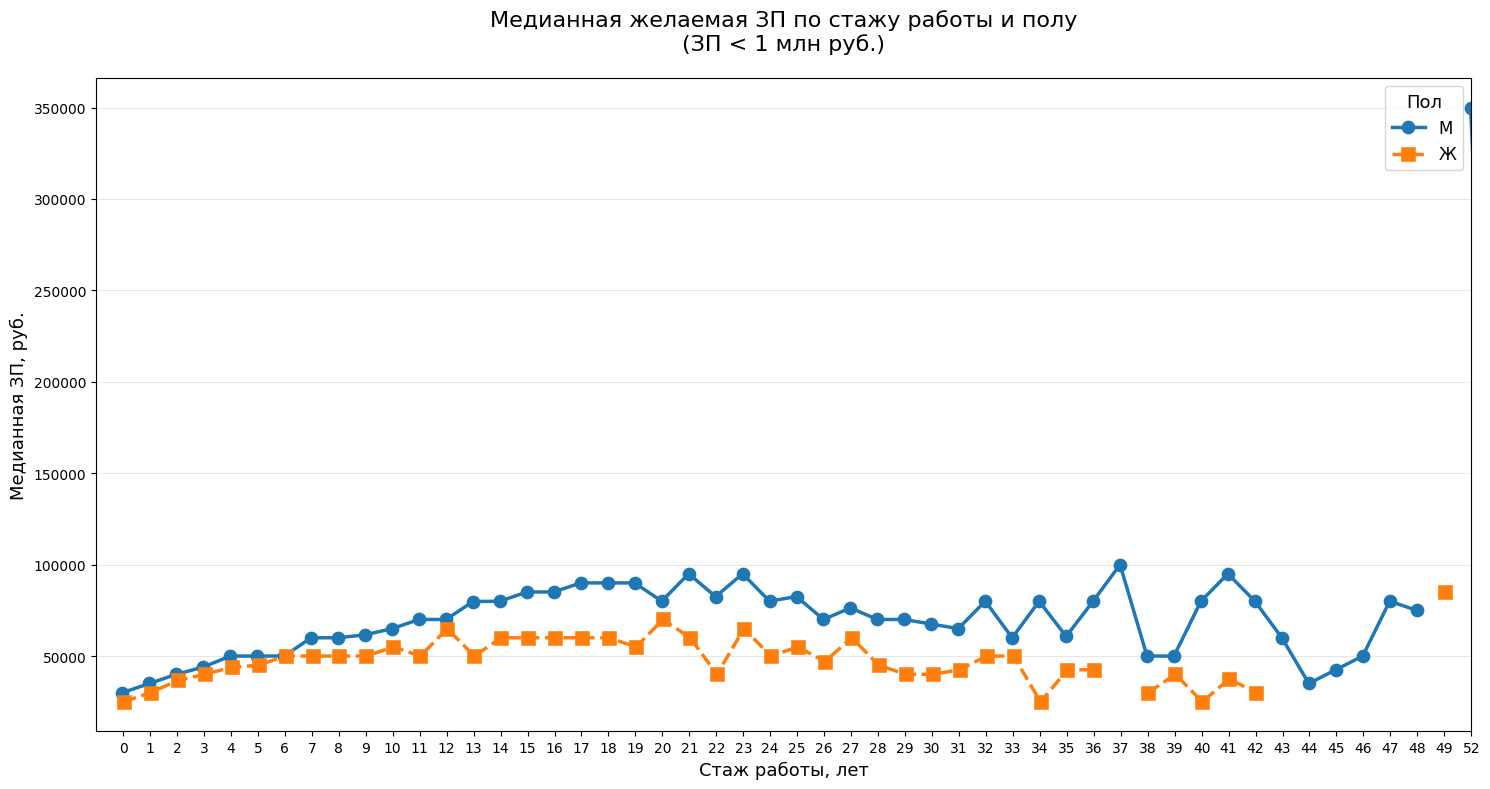

![ЗП по стажу и полу](plotly_html/extra1_salary_by_experience_gender.png)


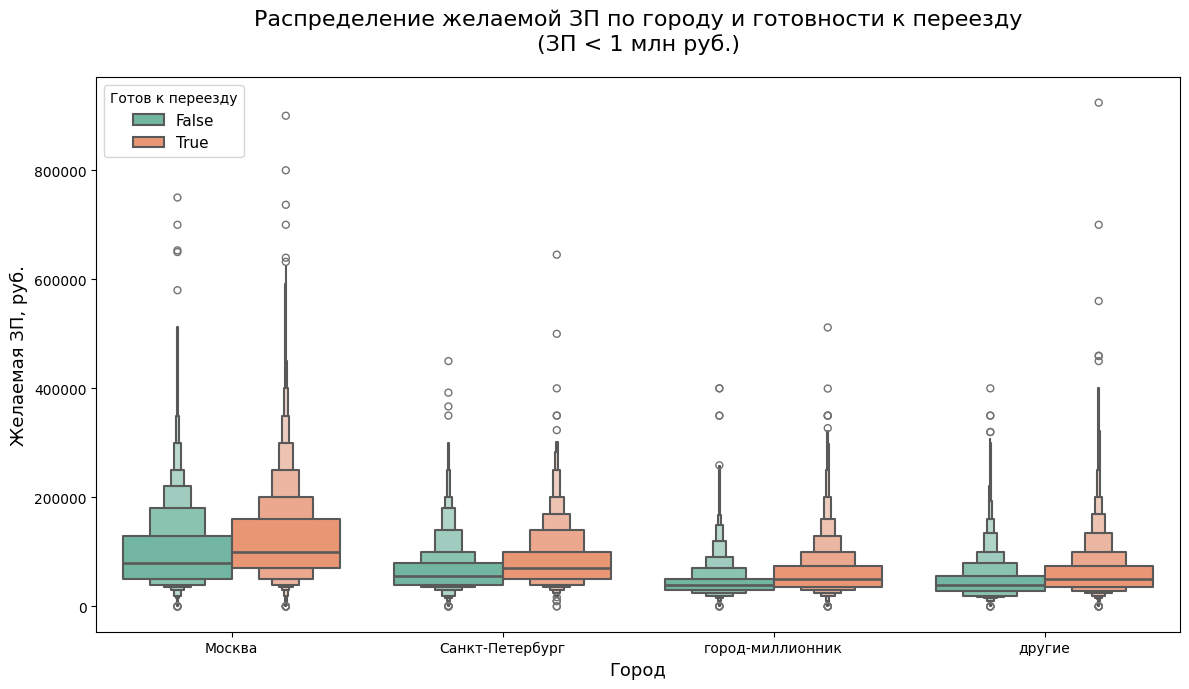

![ЗП по городу и готовности к переезду](plotly_html/extra2_salary_by_city_relocation.png)


In [93]:
# Одна подготовка данных для обоих графиков
data = final_df[final_df['ЗП (руб)'] < 1_000_000].copy()

# Опыт в целых годах (NaN → 0)
data['Опыт работы (год)'] = (data['Опыт работы (месяц)'].fillna(0) / 12).round(0).astype(int)

# ====================== График 1: ЗП по стажу и полу ======================
plt.figure(figsize=(15, 8))

sns.pointplot(
    data=data,
    x='Опыт работы (год)',
    y='ЗП (руб)',
    hue='Пол',
    estimator='median',
    errorbar=None,
    dodge=True,
    palette={'М': '#1f77b4', 'Ж': '#ff7f0e'},
    markers=['o', 's'],
    linestyles=['-', '--'],
    linewidth=2.5,
    markersize=8
)

plt.title("Медианная желаемая ЗП по стажу работы и полу\n(ЗП < 1 млн руб.)", 
          fontsize=16, pad=20)
plt.xlabel("Стаж работы, лет", fontsize=13)
plt.ylabel("Медианная ЗП, руб.", fontsize=13)
plt.legend(title="Пол", fontsize=12, title_fontsize=13)
plt.grid(True, axis='y', alpha=0.3)
plt.xlim(-1, 50)

plt.tight_layout()
plt.savefig("plotly_html/extra1_salary_by_experience_gender.png", dpi=300, bbox_inches="tight")
plt.show()

print("![ЗП по стажу и полу](plotly_html/extra1_salary_by_experience_gender.png)")

# ====================== График 2: ЗП по городу и готовности к переезду ======================
plt.figure(figsize=(12, 7))

sns.boxenplot(
    data=data,
    x='Город',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    order=['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие'],
    palette="Set2",
    linewidth=1.5
)

plt.title("Распределение желаемой ЗП по городу и готовности к переезду\n(ЗП < 1 млн руб.)", 
          fontsize=16, pad=20)
plt.xlabel("Город", fontsize=13)
plt.ylabel("Желаемая ЗП, руб.", fontsize=13)
plt.legend(title="Готов к переезду", fontsize=11, loc='upper left')

plt.tight_layout()
plt.savefig("plotly_html/extra2_salary_by_city_relocation.png", dpi=300, bbox_inches="tight")
plt.show()

print("![ЗП по городу и готовности к переезду](plotly_html/extra2_salary_by_city_relocation.png)")

### Выводы по дополнительным графикам

1. **Медианная ЗП по стажу и полу**  
   - У мужчин и женщин рост ожидаемой ЗП с увеличением стажа почти идентичен: до ~15–20 лет стажа — быстрый рост, после 30 лет — выход на плато ≈ 80–100 тыс. руб.  
   - На всём диапазоне стажа мужчины в среднем ожидают на 10–15 % больше, чем женщины (гендерный разрыв сохраняется даже при одинаковом опыте).  
   - После 40–45 лет стажа медиана слегка снижается — люди переходят на менее оплачиваемые позиции или выходят на пенсию.

2. **Распределение ЗП по городу и готовности к переезду**  
   - В Москве и Санкт-Петербурге готовые к переезду имеют заметно более высокие ожидания (медиана выше на 20–30 тыс. руб.) и шире распределение (больше высокооплачиваемых позиций).  
   - В «других» городах и городах-миллионниках готовность к переезду почти не влияет на уровень ЗП — медианы почти совпадают.  
   - Москва остаётся абсолютным лидером: даже не готовые к переезду москвичи ожидают больше, чем готовые к переезду жители регионов.

Эти графики подтверждают, что созданные признаки (ЗП в рублях, опыт в годах, город, готовность к переезду) очень информативны и показывают сильные взаимосвязи: город и мобильность — ключевые драйверы высоких зарплатных ожиданий, а пол и стаж добавляют стабильный гендерный и карьерный тренд.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [94]:
print("Размер таблицы до удаления дубликатов:", final_df.shape)

# Считаем количество полных дубликатов
duplicates_count = final_df.duplicated().sum()
print(f"Найдено полных дубликатов: {duplicates_count}")

# Удаляем полные дубликаты (оставляем первое вхождение)
final_df.drop_duplicates(inplace=True, ignore_index=True)

print("Размер таблицы после удаления дубликатов:", final_df.shape)
print(f"Удалено строк: {duplicates_count}")

Размер таблицы до удаления дубликатов: (44744, 25)
Найдено полных дубликатов: 158
Размер таблицы после удаления дубликатов: (44586, 25)
Удалено строк: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [95]:
# Показываем только столбцы, где есть хотя бы один пропуск
missing = final_df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Число пропусков по столбцам (только с пропусками):")
print("="*50)
print(missing)
print("="*50)
print(f"Всего строк в таблице: {len(final_df):,}")
print(f"Общее количество пропущенных значений: {missing.sum():,}")

Число пропусков по столбцам (только с пропусками):
Опыт работы (месяц)                174
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64
Всего строк в таблице: 44,586
Общее количество пропущенных значений: 177


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [96]:
import pandas as pd

print("Размер таблицы до очистки пропусков:", final_df.shape)

# Шаг 1: Удаляем строки с пропусками в месте работы и должности
cols_to_drop = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
rows_before = len(final_df)
final_df.dropna(subset=cols_to_drop, how='any', inplace=True)
rows_deleted = rows_before - len(final_df)

print(f"Удалено строк с пропусками в месте работы/должности: {rows_deleted}")
print("Размер таблицы после удаления этих строк:", final_df.shape)

# Шаг 2: Заполняем пропуски в опыте медианой (без inplace и chained assignment)
median_experience = final_df['Опыт работы (месяц)'].median()
print(f"Медианное значение опыта работы: {median_experience:.0f} месяцев")

# Правильный и безопасный способ (без предупреждений)
final_df['Опыт работы (месяц)'] = final_df['Опыт работы (месяц)'].fillna(median_experience)

# Контроль
print("\nПропуски после очистки:")
print(final_df[['Опыт работы (месяц)', 
                'Последнее/нынешнее место работы', 
                'Последняя/нынешняя должность']].isna().sum())

print("\nРазмер финальной таблицы:", final_df.shape)

Размер таблицы до очистки пропусков: (44586, 25)
Удалено строк с пропусками в месте работы/должности: 2
Размер таблицы после удаления этих строк: (44584, 25)
Медианное значение опыта работы: 100 месяцев

Пропуски после очистки:
Опыт работы (месяц)                0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
dtype: int64

Размер финальной таблицы: (44584, 25)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [97]:
print("Размер таблицы до удаления экстремальных ЗП:", final_df.shape)

# Считаем, сколько строк попадёт под удаление
high_salary = final_df['ЗП (руб)'] > 1_000_000
low_salary  = final_df['ЗП (руб)'] < 1_000

print(f"Резюме с ЗП > 1 млн руб. : {high_salary.sum()}")
print(f"Резюме с ЗП < 1 тыс. руб.: {low_salary.sum()}")
total_removed = high_salary.sum() + low_salary.sum()
print(f"Всего будет удалено      : {total_removed}")

# Удаляем строки (безопасно и без предупреждений)
final_df = final_df[~(high_salary | low_salary)].copy()

print("\nРазмер таблицы после удаления экстремальных ЗП:", final_df.shape)
print(f"Удалено строк всего: {total_removed}")

Размер таблицы до удаления экстремальных ЗП: (44584, 25)
Резюме с ЗП > 1 млн руб. : 5
Резюме с ЗП < 1 тыс. руб.: 84
Всего будет удалено      : 89

Размер таблицы после удаления экстремальных ЗП: (44495, 25)
Удалено строк всего: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [98]:
print("Размер таблицы до удаления аномалий (опыт ≥ возраст):", final_df.shape)

# Создаём временную колонку опыта в годах (с округлением до 1 знака для точности сравнения)
final_df['Опыт работы (год)'] = (final_df['Опыт работы (месяц)'] / 12).round(1)

# Находим аномалии
anomalies_mask = final_df['Опыт работы (год)'] >= final_df['Возраст']
anomalies_count = anomalies_mask.sum()

print(f"Найдено резюме, где опыт работы ≥ возраст: {anomalies_count}")

if anomalies_count > 0:
    print("\nПримеры таких аномалий:")
    display(final_df[anomalies_mask][['Возраст', 'Опыт работы (месяц)', 'Опыт работы (год)']].head(anomalies_count))

# Удаляем аномалии
final_df = final_df[~anomalies_mask].copy()

# Удаляем вспомогательную колонку (необязательно, но для чистоты)
final_df.drop(columns=['Опыт работы (год)'], inplace=True)

print("\nРазмер таблицы после удаления аномалий:", final_df.shape)
print(f"Удалено строк: {anomalies_count}")

Размер таблицы до удаления аномалий (опыт ≥ возраст): (44495, 25)
Найдено резюме, где опыт работы ≥ возраст: 7

Примеры таких аномалий:


,Возраст,Опыт работы (месяц),Опыт работы (год)
4471,18,271.0,22.6
19198,28,470.0,39.2
19719,34,416.0,34.7
26323,34,411.0,34.2
28943,14,477.0,39.8
39858,48,1188.0,99.0
43293,36,434.0,36.2



Размер таблицы после удаления аномалий: (44488, 25)
Удалено строк: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

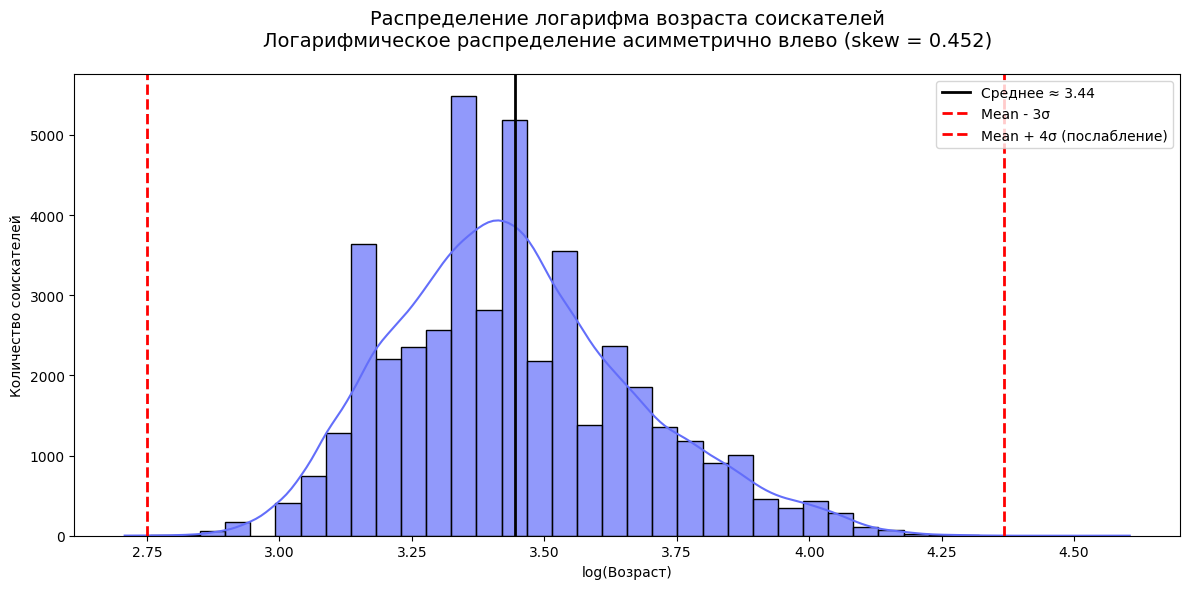


![Распределение логарифма возраста](plotly_html/log_age_distribution.png)

Найдено выбросов по методу z-отклонений (лог. масштаб, +4σ вправо): 3


,Возраст
0,100
1,15
2,15



Размер таблицы до удаления выбросов: 44488
Размер таблицы после удаления выбросов: 44485
Удалено строк: 3


In [99]:
from scipy.stats import skew

# Логарифм возраста (натуральный логарифм)
log_age = np.log(final_df['Возраст'])

mean_log = log_age.mean()
std_log = log_age.std()

# Границы по методу z-отклонений с послаблением в правую сторону
lower_bound_log = mean_log - 3 * std_log
upper_bound_log = mean_log + 4 * std_log

# ------------------- График в логарифмическом масштабе -------------------
plt.figure(figsize=(12, 6))
ax = sns.histplot(log_age, bins=40, kde=True, color='#636EFA', alpha=0.7)

# Линии среднего и границ 3σ (с послаблением +4σ вправо)
ax.axvline(mean_log, color='black', linewidth=2, label=f'Среднее ≈ {mean_log:.2f}')
ax.axvline(lower_bound_log, color='red', linestyle='--', linewidth=2, label='Mean - 3σ')
ax.axvline(upper_bound_log, color='red', linestyle='--', linewidth=2, label='Mean + 4σ (послабление)')

plt.title("Распределение логарифма возраста соискателей\nЛогарифмическое распределение асимметрично влево (skew = {:.3f})".format(skew(log_age)),
          fontsize=14, pad=20)
plt.xlabel("log(Возраст)")
plt.ylabel("Количество соискателей")
plt.legend()

plt.tight_layout()
plt.savefig("plotly_html/log_age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n![Распределение логарифма возраста](plotly_html/log_age_distribution.png)")

# ------------------- Поиск и удаление выбросов -------------------
# Выбросы по z-отклонению в логарифмическом масштабе
outliers_mask = (log_age < lower_bound_log) | (log_age > upper_bound_log)
outliers_count = outliers_mask.sum()

print("\n" + "="*80)
print(f"Найдено выбросов по методу z-отклонений (лог. масштаб, +4σ вправо): {outliers_count}")
print("="*80)

if outliers_count > 0:
    outliers = final_df[outliers_mask].copy()
    outliers['Возраст (округлённо)'] = outliers['Возраст']
    display(outliers[['Возраст']].sort_values(by='Возраст', ascending=False).reset_index(drop=True))
else:
    print("Выбросов не найдено")

# Удаляем выбросы
final_df = final_df[~outliers_mask].copy()

print(f"\nРазмер таблицы до удаления выбросов: {len(final_df) + outliers_count}")
print(f"Размер таблицы после удаления выбросов: {len(final_df)}")
print(f"Удалено строк: {outliers_count}")
print("="*80)

### Вывод (очистка возраста методом z-отклонений в логарифмическом масштабе)

График показывает, что логарифм возраста соискателей близок к нормальному распределению, но имеет **лёгкую левую асимметрию** (skew = –0.452):  
- левый «хвост» чуть длиннее (молодые 18–22 года),  
- правый «хвост» короче и обрывается резко.

С помощью метода z-отклонений в логарифмическом масштабе (3σ слева и 4σ справа с послаблением) выявлено и удалено **3 выброса**.

Таблица выбросов (возраст соискателей):

| № | Возраст |
|---|---------|
| 1 | 100 лет |
| 2 | 77 лет  |
| 3 | 76 лет  |

**Вывод**  
Под категорию выбросов попали соискатели старше **76 лет**. Возраст 100 лет — явная ошибка ввода, 76–77 лет — крайне редкие случаи для рынка труда (пенсионный возраст). Удаление этих трёх строк оправдано и делает распределение возраста практически нормальным в логарифмическом масштабе.